In [2]:
import covid19_inference as cov19
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [3]:
owd = cov19.data_retrieval.OWD(True)
jhu = cov19.data_retrieval.JHU(True)
countries = ["Austria",
    "Belgium",
    "Croatia",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Greece",
    "Italy",
    #"Ireland",
    "Lithuania",
    "Latvia",
    #"Netherlands",
    "Norway",
    "Poland",
    "Portugal",
    "Serbia",
    "Slovakia",
    #"Spain",
    "Slovenia",
    #"Sweden",
    "Switzerland",
    "United Kingdom"]


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local


In [4]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


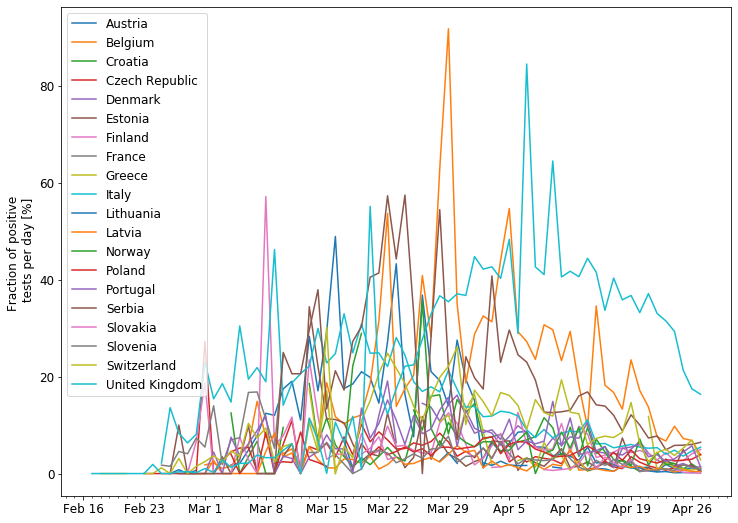

In [15]:
fig, ax = plt.subplots(1,figsize=(12,9))


for this_country in countries:
    tests_cumu = owd.get_total("tests", country=this_country)
    tests_new = owd.get_new("tests", country=this_country)
    if this_country == "Czech Republic":
        cases_cumu = jhu.get_total("confirmed", country="Czechia")
        cases_new = jhu.get_new("confirmed", country="Czechia", data_begin=cases_cumu.index[1])
    else:
        cases_cumu = jhu.get_total("confirmed", country=this_country)
        cases_new = jhu.get_new("confirmed", country=this_country, data_begin=cases_cumu.index[1])
    
    first_date = datetime.datetime(2020,2,17)
    weeks = [first_date + datetime.timedelta(days=i*7) for i in range(20)]
    
    #Plot each week
    percent = cases_new/tests_new*100
    ax.plot(percent[weeks[0]:weeks[10]],label=this_country)
ax.set_ylabel("Fraction of positive \n tests per day [%]")
cov19.plot._format_date_xticks(ax)
ax.legend()